Let $\mathcal{P}_n$ be the permutahedron resulting from the braid arrangement $\mathcal{H}(n)$. 

We try to gain insight of the geometric structure of $\mathcal{P}_n$ for small $n$:
 - [n = 2](https://sagecell.sagemath.org/?z=eJwryM-pLMkvSC3WK0gtyi0tScxITSnKz9Mw0tQryMkv0dAEAOJADF0=&lang=sage&interacts=eJyLjgUAARUAuQ==): $\mathcal{P}_1$ is a 1D object (in other words a line) living in 2D ambient space - pretty boring in my opinion
 - [n = 3](https://sagecell.sagemath.org/?z=eJwryM-pLMkvSC3WK0gtyi0tScxITSnKz9Mw1tQrSs1LSS2KL88sSk0rSsxN1dAEAJwEEUA=&lang=sage&interacts=eJyLjgUAARUAuQ==): As discussed in class and Fig 5.3 in the book, $\mathcal{P}_2$  is a 2D hexagon embedded in 3D space
 - [n = 4](https://sagecell.sagemath.org/?z=eJwryM-pLMkvSC3WK0gtyi0tScxITSnKz9Mw0dQryMkv0UjLzMmxVS_PyCxJVdcEAJZHELI=&lang=sage&interacts=eJyLjgUAARUAuQ==): $\mathcal{P}_3$ is a 3D [truncated octahedron](https://en.wikipedia.org/wiki/Truncated_octahedron) embedded in 4D space; we cannot plot the embedded space - nonetheless we can plot the polyhedron

For higher $n$, things get more difficult to visualize - however, we can attempt:

For $\mathcal{P}_5$, we have a 4-dimensional polytope embedded in a 5 dimensional space. We can project this polyhedron into 3 dimensions which is what Sage does [here](https://sagecell.sagemath.org/?z=eJwryM-pLMkvSC3WK0gtyi0tScxITSnKz9Mw1dQryMkv0dAEAOJbDGA=&lang=sage&interacts=eJyLjgUAARUAuQ==)

It would be much better if we colored the nodes to get some perspective - below is a code snippet that does this but projects down to 2 dimensions

<>:15: SyntaxWarning: invalid escape sequence '\('
<>:15: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_20658/3347117305.py:15: SyntaxWarning: invalid escape sequence '\('
  perm_s = re.findall( '\(.*\)', str(node) )[Integer(0)][Integer(1):-Integer(1)]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 16135.56it/s]


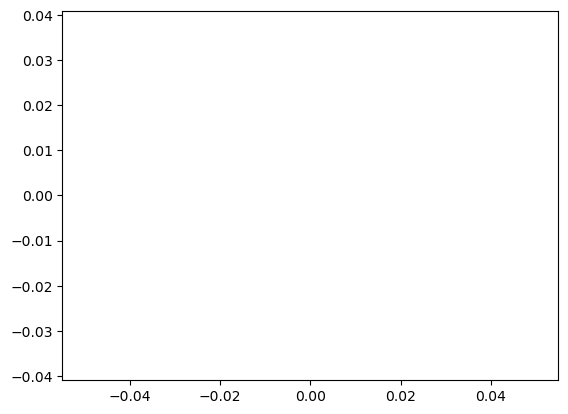

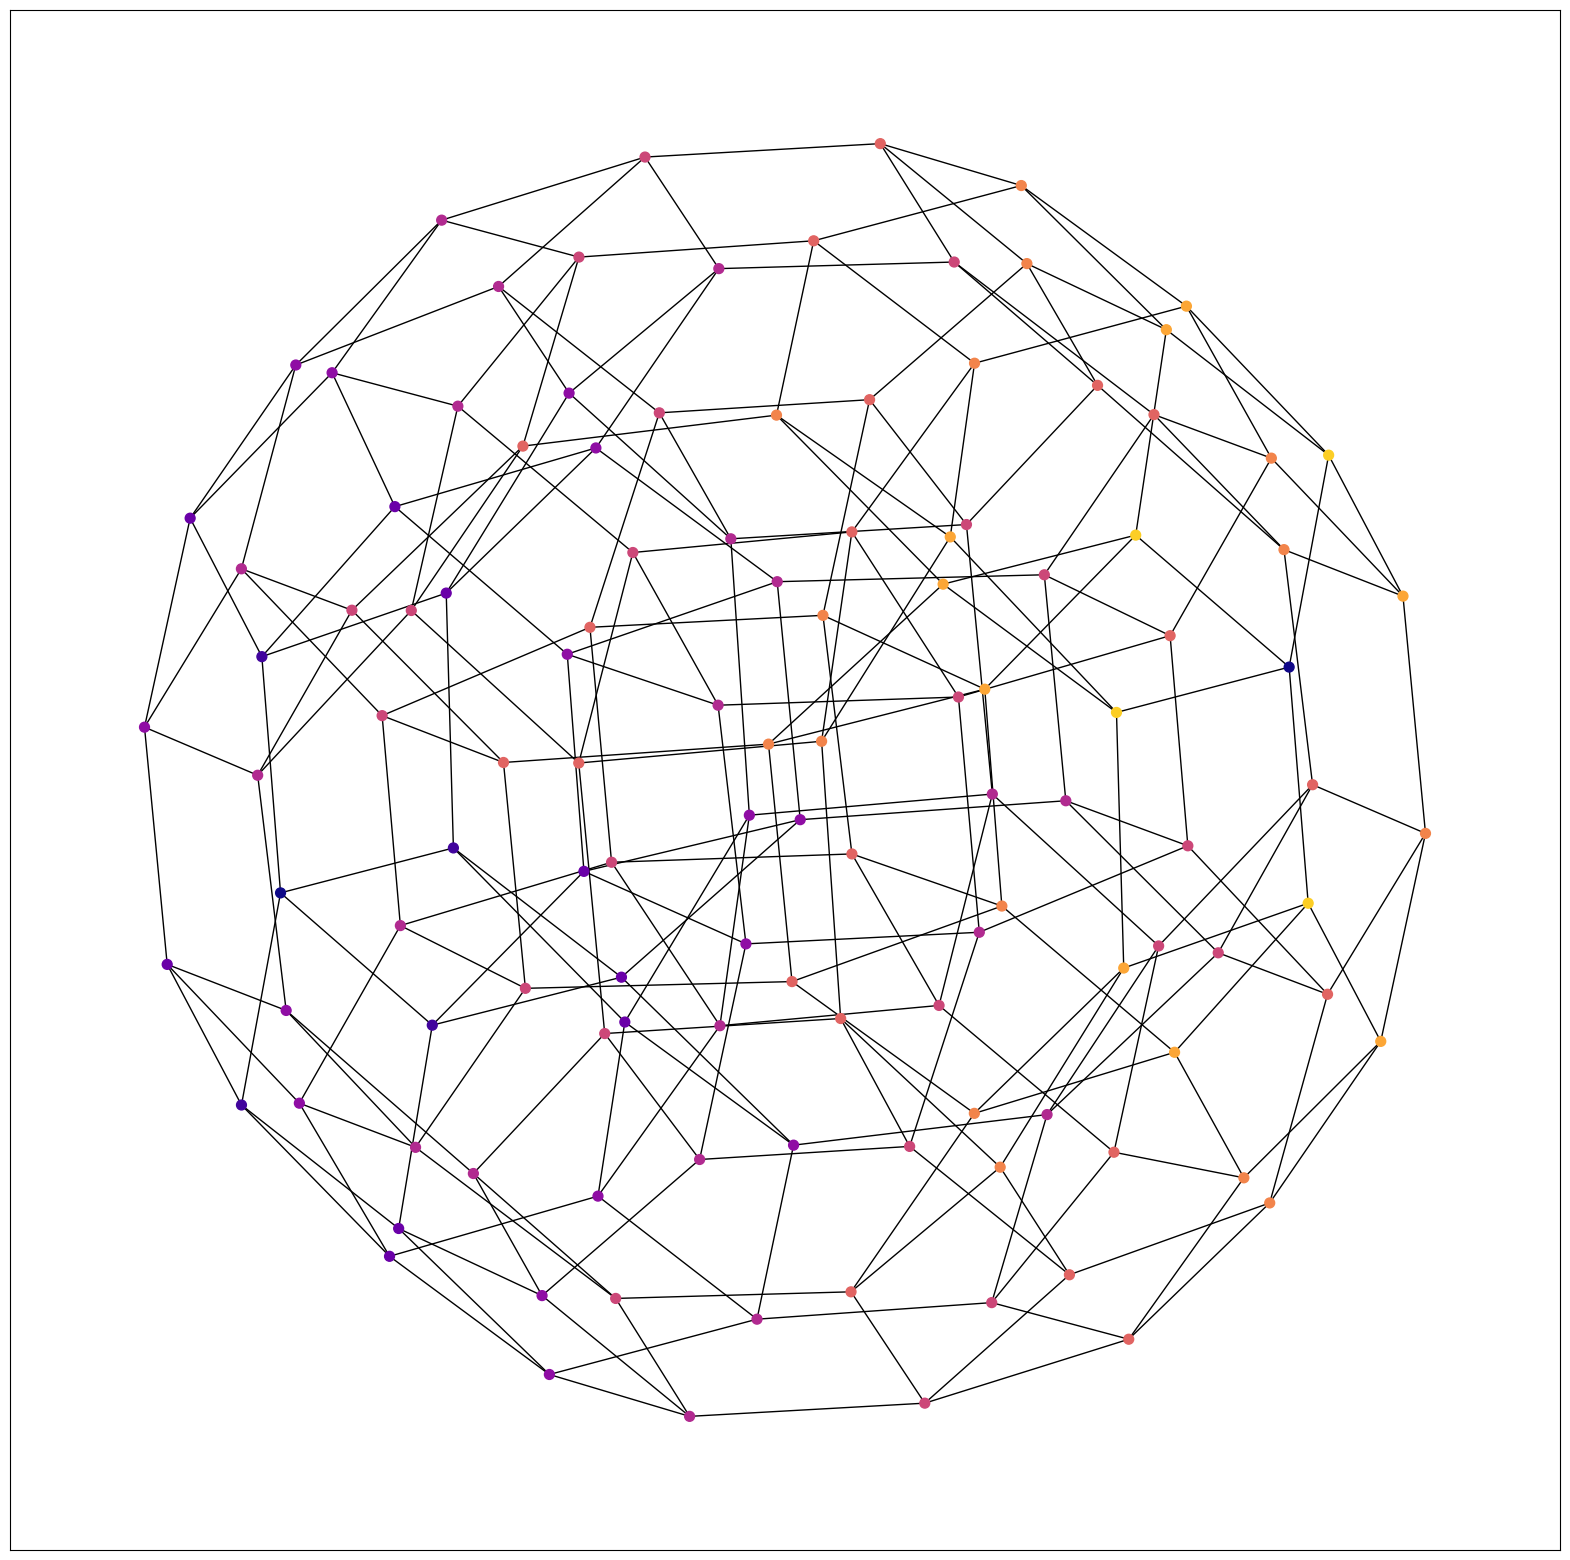

In [280]:
from tqdm import tqdm
import re
from matplotlib import cm
import matplotlib.pyplot as plt
from collections import defaultdict
import networkx as nx
import numpy as np

N = 5
S_N = SymmetricGroup(N)
permutahedron_graph = polytopes.permutahedron(N).graph()
G = nx.DiGraph()
node_translate = {}
for node in tqdm(permutahedron_graph.vertices()):
    perm_s = re.findall( '\(.*\)', str(node) )[0][1:-1]
    node_translate[str(node)] = S_N([int(i) for i in perm_s.split(',')])
for edge in tqdm(permutahedron_graph.edges()):
    G.add_edge(node_translate[str(edge[0])], node_translate[str(edge[1])])
colors = [ tuple( cm.plasma( len( g.inversions() )/binomial(N, 2)) )  for i, g in enumerate(G) ]

plt.axis('equal')
plt.figure(figsize=(20,20))
nx.draw_networkx(
    G,
    pos=nx.nx_agraph.graphviz_layout( G ),
    node_color = colors,
    arrows = False,
    with_labels = False,
    node_size=50
)

Here, the cooler the node is colored the fewer inversions the permutation the node represents has. While this may look very noisy at first, some structure can be observed by noticing subgraphs ( which may correpsonding to 3D or 4D faces ? )
Any additional thoughts would be appreciated. I think [this MathOverflow post](https://mathoverflow.net/questions/25983/intuitive-crutches-for-higher-dimensional-thinking) may also be relevant / a nice general read.